# **Customer Segmentation for Marketing Strategies** 

##  **Business Understanding**

## Introduction

 In the ever-evolving landscape of marketing, understanding customer behavior is paramount for businesses aiming to tailor their strategies effectively. Customer segmentation, a pivotal aspect of marketing analytics, facilitates the categorization of customers into distinct groups based on shared characteristics. This segmentation enables businesses to craft personalized marketing approaches, thereby enhancing customer satisfaction and optimizing resource allocation. This study delves into the realm of customer segmentation using clustering techniques, with a specific focus on leveraging purchasing behavior as a primary criterion. The objective is to unravel patterns within a dataset—namely, the Mall Customer Segmentation Data—that offer insights into diverse customer personas. By dissecting these patterns, businesses can better comprehend the nuances of their customer base, paving the way for targeted marketing strategies that resonate with specific segments.


**Objective:**

Use clustering techniques to segment customers into distinct groups based on purchasing behavior.

In [3]:
# Data manipulation packages
import pyodbc
from sqlalchemy import create_engine
from dotenv import dotenv_values
import pandas as pd
import numpy as np

#Data visualization packages
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.cluster import KMeans

Load Data

In [4]:
# load dataset from df_mall_customers DataFrame
df_mall_customers = pd.read_csv ('Dataset/Mall_Customers.csv')
# first 5 row in DataFrame
df_mall_customers.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
# Show the number of record and columuns
df_mall_customers.shape

(200, 5)

In [6]:
# show information of the dataset
df_mall_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
# check for missing values in DataFrame
df_mall_customers.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

### <b> Univariate Data analysis

In [8]:
#Dropped the customer Id because I felt it was not important for our analysis
del df_mall_customers['CustomerID']

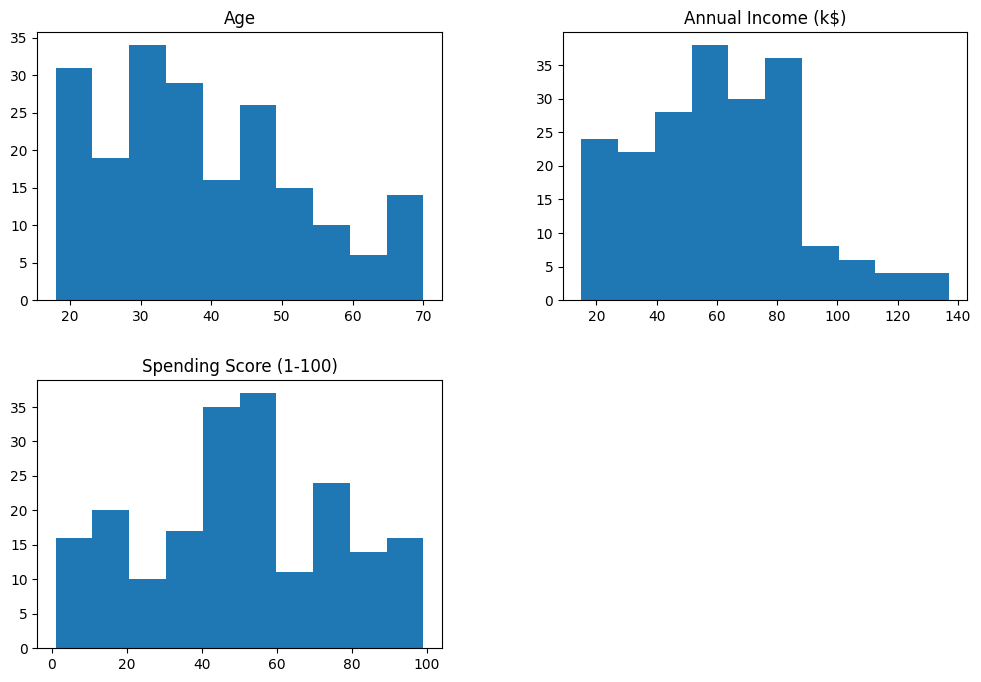

In [9]:
# Visualizing the distribution of Numerical Variables
df_mall_customers.hist(figsize=(12,8), grid= False)
plt.show()

### Checking for outliers

C:\Users\Sami\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\seaborn\_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\Sami\AppData\Local\Temp\ipykernel_10980\1420960014.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_mall_customers['Age'], orient='v', palette='viridis')


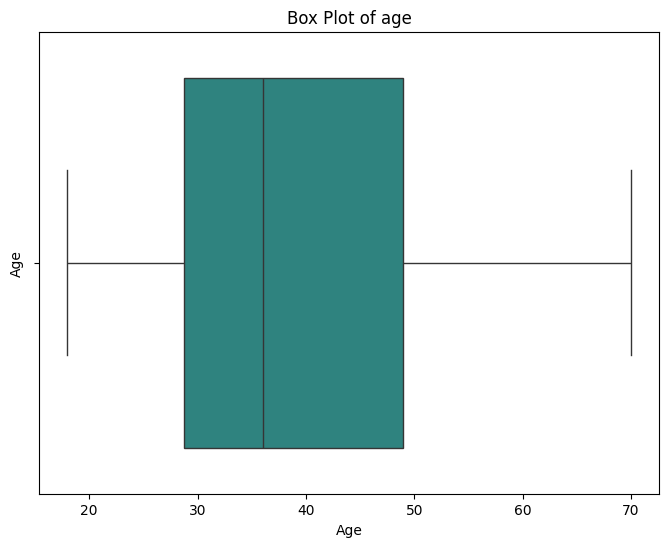

In [10]:
# Set the size of the plot
plt.figure(figsize=(8, 6))

# Create a box plot for the 'age' column
sns.boxplot(x=df_mall_customers['Age'], orient='v', palette='viridis')

# Set plot labels and title
plt.title('Box Plot of age')
plt.ylabel('Age')

# Show the plot
plt.show()

C:\Users\Sami\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\seaborn\_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\Sami\AppData\Local\Temp\ipykernel_10980\2710051318.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_mall_customers['Annual Income (k$)'], orient='v', palette='viridis')


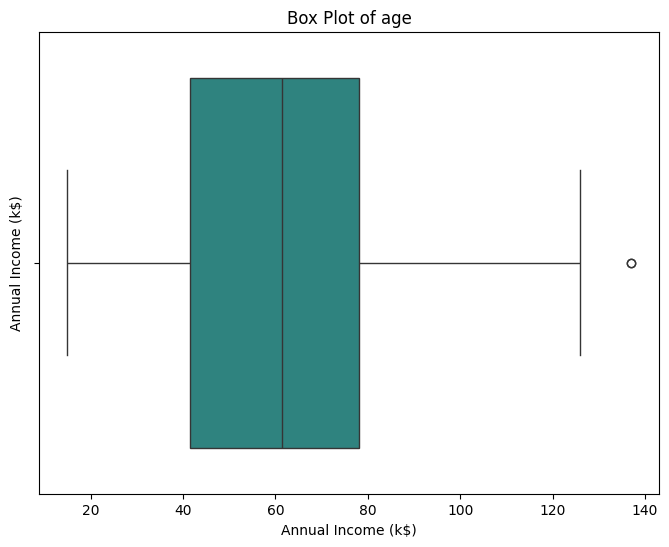

In [11]:
# Set the size of the plot
plt.figure(figsize=(8, 6))

# Create a box plot for the 'age' column
sns.boxplot(x=df_mall_customers['Annual Income (k$)'], orient='v', palette='viridis')

# Set plot labels and title
plt.title('Box Plot of age')
plt.ylabel('Annual Income (k$)')

# Show the plot
plt.show()

C:\Users\Sami\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\seaborn\_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\Sami\AppData\Local\Temp\ipykernel_10980\422073900.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_mall_customers['Spending Score (1-100)'], orient='v', palette='viridis')


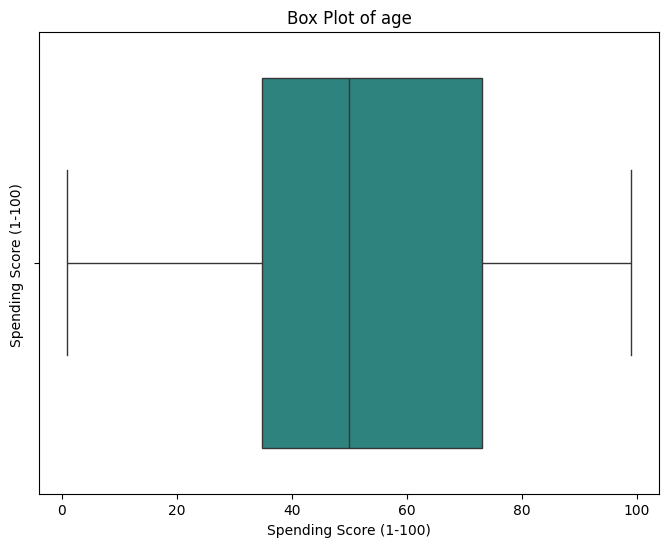

In [12]:
# Set the size of the plot
plt.figure(figsize=(8, 6))

# Create a box plot for the 'age' column
sns.boxplot(x=df_mall_customers['Spending Score (1-100)'], orient='v', palette='viridis')

# Set plot labels and title
plt.title('Box Plot of age')
plt.ylabel('Spending Score (1-100) ')

# Show the plot
plt.show()

Choosing the Annual Income Column & Spending Score column

In [13]:
# Extract columns 3 and 4
x = df_mall_customers.iloc[:, [2, 3]].values

In [14]:
print(x)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

Choosing the number of clusters

WCSS -> Within Clusters Sum of Squares

In [15]:
# finding wcss value for different number of clusters

wcss = []

for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(x)

  wcss.append(kmeans.inertia_)

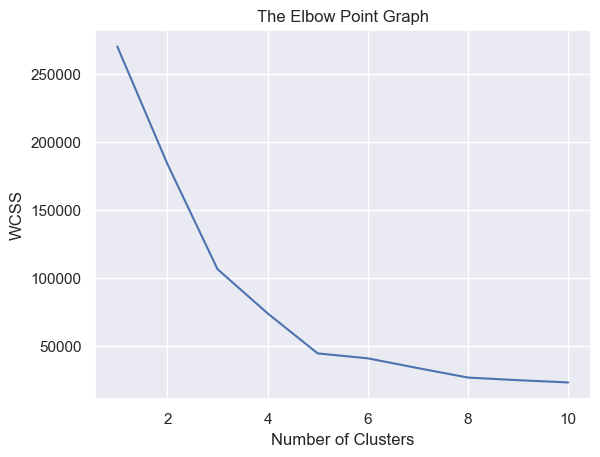

In [16]:
# plot an elbow graph
sns.set()
plt.plot(range(1,11), wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

 observations:

1. Elbow Method Application: The graph is a classic example of the elbow method used in determining the optimal number of clusters for K-means clustering. The method involves plotting the Within-Cluster-Sum-of-Squares (WCSS) against the number of clusters and looking for the ‘elbow point’ where the rate of decrease sharply changes.
2. Optimal Clusters: The elbow point on the graph is around the number 4, indicating that four clusters might be the optimal number for this particular dataset. This is where the WCSS value starts to decrease at a slower rate, suggesting that adding more clusters beyond this point does not significantly improve the variance explained by the clustering.
3. WCSS Trend: Initially, the WCSS values decrease rapidly as the number of clusters increases from 2 to 4, which implies that each additional cluster is capturing a significant amount of variance within the data. After the number of clusters reaches 4, the reduction in WCSS becomes more gradual, indicating diminishing returns on the explained variance.
4. Cluster Analysis: The analysis suggests that the data can be reasonably grouped into four distinct categories, which could represent different segments or types of data points within the overall dataset.
5. Implications for Data Analysis: The elbow graph is a crucial step in cluster analysis as it helps in deciding how many clusters to use, which can significantly impact the results of the analysis and the insights that can be drawn from it.

Optimum Number of Clusters = 5

Training the k-Means Clustering Model

In [17]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0)

# return a label for each data point based on their cluster
Y = kmeans.fit_predict(x)

print(Y)

[3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3
 4 3 4 3 4 3 0 3 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 0 1 2 1 2 1 0 1 2 1 2 1 2 1 2 1 0 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]


this are the cluster they are belong to

5 Clusters - 0, 1, 2, 3, 4

Visualizing all the Clusters

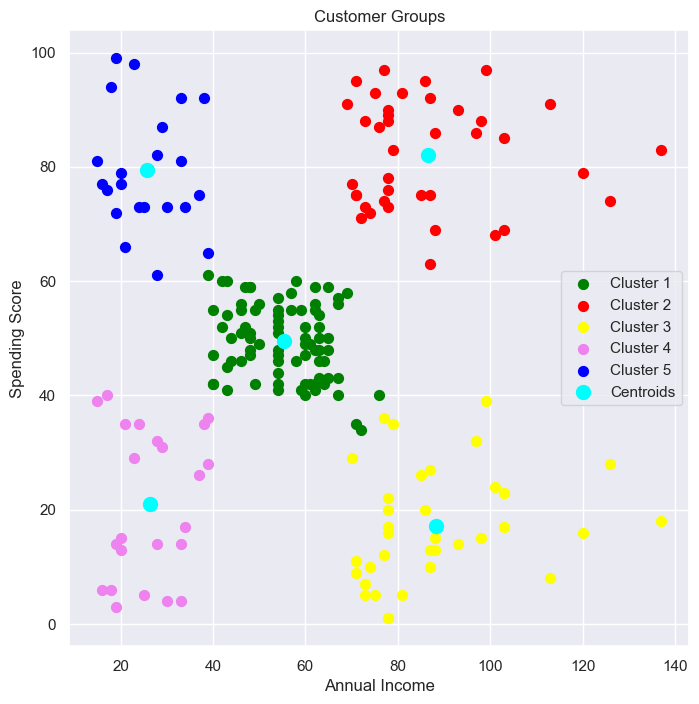

In [18]:
# plotting all the clusters and their Centroids

plt.figure(figsize=(8,8))
plt.scatter(x[Y==0,0], x[Y==0,1], s=50, c='green', label='Cluster 1')
plt.scatter(x[Y==1,0], x[Y==1,1], s=50, c='red', label='Cluster 2')
plt.scatter(x[Y==2,0], x[Y==2,1], s=50, c='yellow', label='Cluster 3')
plt.scatter(x[Y==3,0], x[Y==3,1], s=50, c='violet', label='Cluster 4')
plt.scatter(x[Y==4,0], x[Y==4,1], s=50, c='blue', label='Cluster 5')

# plot the centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='cyan', label='Centroids')

plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

Clusters Identification: There are five distinct clusters, each likely representing a different type of customer group:
1. Blue Cluster: Customers with low annual income (20-40) but high spending scores (60-100).
2. Red Cluster: Customers with high annual income (70-140) and high spending scores (60-100).
3. Green Cluster: Customers with moderate annual income (40–70) and moderate spending scores (40–60).
4. Purple Cluster: Customers with low annual income (20–40) and low spending scores (0–40).
5. Yellow Cluster: Customers with high annual income (70–140) but low spending scores (0–40).

Marketing Insights: This kind of analysis can provide valuable insights for targeted marketing strategies. For example, customers in the red cluster might be targeted for luxury goods, while those in the purple cluster might be more responsive to cost-saving offers.
Data Distribution: The distribution of data points within each cluster can give an idea about the variance in the spending behavior of customers within the same income range.
Potential Strategies: Based on the clusters, businesses can tailor their marketing strategies to better meet the needs of each customer group, potentially increasing sales and customer satisfaction.

In conclusion, the scatter plot analysis reveals distinct customer groups based on their annual income and spending score, which can be leveraged to create targeted marketing strategies. The blue and red clusters represent customers with high spending scores but at opposite ends of the income spectrum, suggesting different approaches for engagement. The green cluster represents a stable market segment with moderate income and spending, which could be the target for consistent, long-term marketing efforts. The purple and yellow clusters indicate groups with low spending scores, but differing incomes, highlighting potential for upselling or value-based marketing. Overall, this data-driven approach can guide businesses in customizing their offerings and promotions to meet the unique needs and preferences of each customer segment, ultimately aiming to enhance customer satisfaction and drive sales growth.